# Approximating Eigenvalues and Eigenvectors 1 - Power Iteration

## The Importance of Eigenvalues and Eigenvectors

There are several reasons that we may want to know the eigenvalues and/or eigenvectors of a matrix $A$. Below is a quite incomplete but motivating list: 

- The 'eigenbasis' gives us an easier basis with which to understand the linear transformation that $A$ effects.
- If $A$ is a Markov matrix, the principal eigenvector tells us the steady state of the system.
- If $A$ is the coefficient matrix of a linear system too large to solve by hand, iterative approximation techniques for solving the system will converge if all eigenvalues of $A$ have magnitude less than 1, but cannot be guaranteed to converge if $A$ has eigenvalues with magnitude greater than 1.
- In machine learning and statistical analysis, *Principal Component Analysis* is a widely-used technique for reducing the size of a dataset while keeping most of the important information in it, and the technique is based on the computation of the eigenvalues and eigenvectors of our old friend $A^TA$.
- Recommendation systems and search engines use eigenvector-based algorithms to make recommendations or find search results.  
- In machine learning and generative artificial intelligence, *Spectral Normalization* is a technique for stabilizing the learning process for certain neural network architectures that requires scaling matrices by the largest eigenvalue of the matrix during the training process.

In fact, one of the most famous algorithms in the world, Google's PageRank algorithm, is based on approximating the principal eigenvector of a matrix using the method described in this section.

In the last section definitions and techniques were introduced to allow by-hand computation of eigenvalues and eigenvectors of $2\times2$ matrices, but these techniques are not practical for larger problems. In this section we will look at one algorithm for computing the dominant eigenvalue and eigenvector of a matrix.

## The Power Iteration Method

The Power Iteration Method of eigenvalue approximation, also known as *Von Mises* iteration, is similar in spirit to obtaining the steady-state of a Markov chain by iterating through it but it works for many different types of matrices, not only Markov matrices. It rests on two assumptions about a matrix $A$ (assumptions that you may note are satisfied by any Markov matrix):

- $A$ has an eigenvalue that is strictly greater than all of $A$'s other eigenvalues.
- We can find a vector $\mathbf{b}$ with a nonzero component in the direction of the principal eigenvector of $A$.

Assuming these to be true, we can iterate to produce the dominant eigenvector of $A$ using the following formula:

$$
    \mathbf{b}_{k+1} = \frac{A\mathbf{b}_k}{||A\mathbf{b}_k||}.
$$

Once we estimate $\mathbf{b}_{k+1}$, we can estimate the eigenvalue of the dominant eigenvector as well using the *Rayleigh quotient*:

$$
    \lambda_{k+1} = \frac{\mathbf{b}_{k+1}^TA\mathbf{b}_{k+1}}{\mathbf{b}_{k+1}^T\mathbf{b}_{k+1}},
$$

though you may note that the naming of the Rayleigh quotient is not ideal because $\mathbf{b}_{k+1}$ has been normalized, so the denominator in the Rayleigh quotient, which is the squared norm of $\mathbf{b}_{k+1}$, is in fact just 1 and the formula reduces to:

$$
    \lambda_{k+1} = \mathbf{b}_{k+1}^TA\mathbf{b}_{k+1}.
$$

```{admonition} Power Iteration Algorithm
Let $A$ be a square matrix and suppose that 
- $A$ has an eigenvalue that is strictly greater than all of $A$'s other eigenvalues.
- We can find a vector $\mathbf{b}$ with a nonzero component in the direction of the principal eigenvector of $A$.
Then the dominant eigenvector of $A$ can be approximated using the recursive formula

$$
    \mathbf{b}_{k+1} = \frac{A\mathbf{b}_k}{||A\mathbf{b}_k||}
$$

while the associated eigenvalue $\lambda_{max}$ can be approximated with the recursive formula

$$
    \lambda_{k+1} = \mathbf{b}_{k+1}^TA\mathbf{b}_{k+1}.
$$
```

Why do these formulas work? Let's assume the approximation formula for the dominant eigenvector and consider the approximation of $\lambda_{max}$, the eigenvalue associated to the dominant eigenvector, using the Rayleigh quotient first. 

If we assume that $\mathbf{b}_{k+1}$ is approximately the dominant eigenvector of $A$, then $A\mathbf{b}_{k+1} \approx \lambda_{max}\mathbf{b}_{k+1}$. Then $\mathbf{b}_{k+1}^TA\mathbf{b}_{k+1} \approx \lambda_{max}\mathbf{b}_{k+1}^T\mathbf{b}_{k+1} = \lambda_{max}||\mathbf{b}_{k+1}||^2$, but $||\mathbf{b}_{k+1}|| = 1$ because it was already normalized. So $\mathbf{b}_{k+1}^TA\mathbf{b}_{k+1} \approx \lambda_{max}$.

Now let's consider the formula for the dominant eigenvector. We will prove this in the case where $A$ is diagonalizable; that is, where $A$ has $n$ linearly independent eigenvectors. A formal proof in the general case is similar in spirit but much more complex.

Suppose that $A$ has $n$ linearly independent eigenvectors $\mathbf{x}_1,\dots, \mathbf{x}_n$. Call our initial guess for the dominant eigenvector of $A$ $\mathbf{b}_0$. We can write

$$
    \mathbf{b}_0 = c_1\mathbf{x}_1 + \cdots + c_n\mathbf{x}_n,
$$

and when we multiply by $A$, the result is scalar multiplication in the direction of the eigenvectors:

$$
    \begin{align}
        A\mathbf{b}_0 &= c_1A\mathbf{x}_1 + \cdots + c_nA\mathbf{x}_n \\
                      &= c_1\lambda_1\mathbf{x}_1 + \cdots + c_n\lambda_n\mathbf{x}_n.
    \end{align}
$$

If we multiply by $A$ many times, this becomes

$$
    \begin{align}
        A^k\mathbf{b}_0 &= c_1A^k\mathbf{x}_1 + \cdots + c_nA^k\mathbf{x}_n \\
                      &= c_1\lambda_1^k\mathbf{x}_1 + \cdots + c_n\lambda_n^k\mathbf{x}_n.
    \end{align}
$$

This is analagous to the analysis we did of Markov matrices previously, but we no longer have the assumptions that the matrix has a dominant eigenvalue of 1 to rely on. Assume without loss of generality that $\lambda_1$ is the largest eigenvalue of $A$. Then continuing the above calculation,

$$
    \begin{align}
        A^k\mathbf{b}_0 &= c_1A^k\mathbf{x}_1 + \cdots + c_nA^k\mathbf{x}_n \\
                      &= c_1\lambda_1^k\mathbf{x}_1 + \cdots + c_n\lambda_n^k\mathbf{x}_n \\
                      &= \lambda_1^k(c_1\mathbf{x}_1 + (\frac{\lambda_2}{\lambda_1})^k\mathbf{x}_2 + \cdots + c_n(\frac{\lambda_n}{\lambda_1})^k\mathbf{x}_n),
    \end{align}
$$

and now because we have assumed $\lambda_1 > \lambda_i$ for $2 \leq i \leq n$, the quotients $\lambda_i/\lambda_1 < 1$, so in fact for large enough $k$, we have

$$
    A^k\mathbf{b}_0 \to \lambda_1^k(c_1\mathbf{x}_1),
$$

a scalar multiple of the dominant eigenvector $\mathbf{x}_1$ that we are seeking.

Why do we need to scale at each step? That is, why $\mathbf{b}_{k+1} = A\mathbf{b}_k/||A\mathbf{b}_k||$ instead of just $\mathbf{b}_{k+1} = A\mathbf{b}_k$ for 'large enough' $k$, as would seem sufficient based on the above argument? Although $A^k\mathbf{b}_0 \to \lambda_1^k(c_1\mathbf{x}_1)$ as $k\to\infty$, if $\lambda_1 > 1$, then $\lambda_1^k\to\infty$ as $k\to\infty$. Normalizing at each step insures that we have a unit vector in the dominant direction and multiplication by $A$ does not blow it up.

## A Power Iteration Python Function

The function below will approximate the pair $(\mathbf{x}, \lambda_{max})$, where $\mathbf{x}$ is the dominant eigenvector of some matrix $A$ and $\lambda_{max}$ is the associated eigenvalue. The number of power iterations to perform can be specified or it can be run until a certain accuracy is achieved (this is discussed in more detail further down). The initial vector can be specified or a random vector will be generated to start the iterations. In addition to $\mathbf{x}$ and $\lambda_{max}$, the function returns the history of approximated values of $\lambda$ as well as the iteration at which convergence occurs (again, more detail further down).

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def power_iteration(A, num_iterations=200, initial_vector=None, tolerance=1e-8):
    """
    Compute dominant eigenvalue and eigenvector using power iteration.

    Parameters:
    -----------
    A : ndarray
        Square matrix
    num_iterations : int
        Number of iterations
    initial_vector : ndarray, optional
        Starting vector. If None, uses random vector.
    tolerance : float
        Convergence tolerance

    Returns:
    --------
    eigenvalue : float
        Dominant eigenvalue
    eigenvector : ndarray
        Corresponding eigenvector
    history : list
        Eigenvalue estimates at each iteration
    converged_at : int
        Iteration where convergence criterion was met (or -1)
    """
    n = A.shape[0]

    # Initialize vector
    if initial_vector is None:
        v = np.random.rand(n)
    else:
        v = initial_vector.copy()

    v = v / linalg.norm(v)

    eigenvalue_history = []
    converged_at = -1
    prev_eigenvalue = 0

    for i in range(num_iterations):
        # Multiply by matrix
        v_new = A @ v

        # Compute eigenvalue estimate (Rayleigh quotient)
        eigenvalue = v.T @ v_new
        eigenvalue_history.append(eigenvalue)

        # Check convergence
        if i > 0 and abs(eigenvalue - prev_eigenvalue) < tolerance and converged_at == -1:
            converged_at = i

        prev_eigenvalue = eigenvalue

        # Normalize
        v = v_new / linalg.norm(v_new)

    return eigenvalue, v, eigenvalue_history, converged_at

**Example:** Let's take a $2\times2$ example where we can compute the exact eigenvalues and eigenvectors by hand if we wish (do this as an exercise!). We will set

$$
    A = \begin{bmatrix}
            3 & 1 \\
            0 & 2
        \end{bmatrix}, \mathbf{v}_0 = \begin{bmatrix}
        1 \\
        1
        \end{bmatrix}.
$$

In [2]:
A = np.array([[3, 1], [0, 2]])
initial_vector = np.array([2, 1]).T
num_iter = 10

eigenvalue, eigenvector, eigenvalue_history, _ = power_iteration(A, num_iter, initial_vector)

print(f"\n--- Power Iteration Results ---")
print(f"Iterations: {num_iter}")
print(f"Estimated dominant eigenvalue: {eigenvalue:.6f}")
print(f"Estimated eigenvector: {eigenvector}")


--- Power Iteration Results ---
Iterations: 10
Estimated dominant eigenvalue: 3.008669
Estimated eigenvector: [0.9999831  0.00581402]


Although we can do the eigenvector and eigenvalue computations by hand, let's use NumPy to check the accuracy of the eigenvalue estimate.

In [3]:
# Verify with NumPy
true_eigenvalues, _ = linalg.eig(A)
max_eigenvalue = true_eigenvalues.max()

print(f"\n--- Verification (NumPy) ---")
print(f"True dominant eigenvalue: {max_eigenvalue:.6f}")
print(f"Error: {abs(eigenvalue - max_eigenvalue):.2e}")


--- Verification (NumPy) ---
True dominant eigenvalue: 3.000000+0.000000j
Error: 8.67e-03


Let's look next at the dominant eigenvector. We can gauge the error in the estimate of the dominant eigenvector by measuring the norm of its difference with the true eigenvector in a case like this where we can actually calculate the true eigenvector, but in more realistic settings where we can't produce the true eigenvector we can measure the error based on the eigenvector relationship to $A$: letting $\mathbf{x}$ represent our eigenvector estimate and $\lambda$ our eigenvalue estimate, it must be the case that $A\mathbf{x} \approx \lambda\mathbf{x}$. If so, then $||A\mathbf{x} - \lambda\mathbf{x}|| \approx 0$. The vector $A\mathbf{x} - \lambda\mathbf{x}$ is called the *residual* vector, and $||A\mathbf{x} - \lambda\mathbf{x}||$ is the *residual norm*.

In [4]:
# Verify eigenvector
residual = A @ eigenvector - eigenvalue * eigenvector
residual_norm = linalg.norm(residual)

print(eigenvector)
print(f"\nResidual ||Av - λv||: {residual_norm:.2e}")

[0.9999831  0.00581402]

Residual ||Av - λv||: 6.52e-03


Looking back for a moment, note that the residual norm is used in our `power_iteration` function to determine when convergence has happened if we do not specify the number of iterations to perform. In this case the function iterates until the residual norm is less than the tolerance specified (or set as the default). 

It looks like our approximation above is good. Let's look at the eigenvalue history.

/Users/jwj2/opt/anaconda3/envs/linalg/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


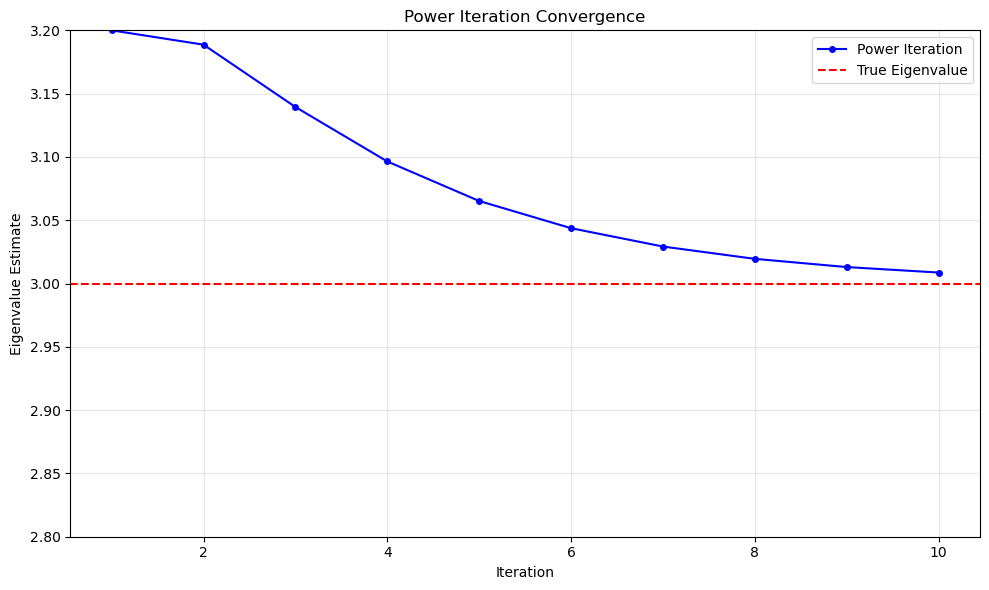

In [5]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalue_history) + 1), eigenvalue_history, 'b-o', markersize=4, label='Power Iteration')
plt.axhline(y=max_eigenvalue, color='r', linestyle='--', label='True Eigenvalue')
plt.ylim(2.8, 3.2)
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Estimate')
plt.title('Power Iteration Convergence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

What if we had started from a random initial guess?

In [6]:
np.random.seed(42)

initial_vector = np.random.uniform(size=(2,))
num_iter = 10

eigenvalue, eigenvector, eigenvalue_history, _ = power_iteration(A, num_iter, initial_vector)

print(f"\n--- Power Iteration Results ---")
print(f"Iterations: {num_iter}")
print(f"Estimated dominant eigenvalue: {eigenvalue:.6f}")


--- Power Iteration Results ---
Iterations: 10
Estimated dominant eigenvalue: 3.018647


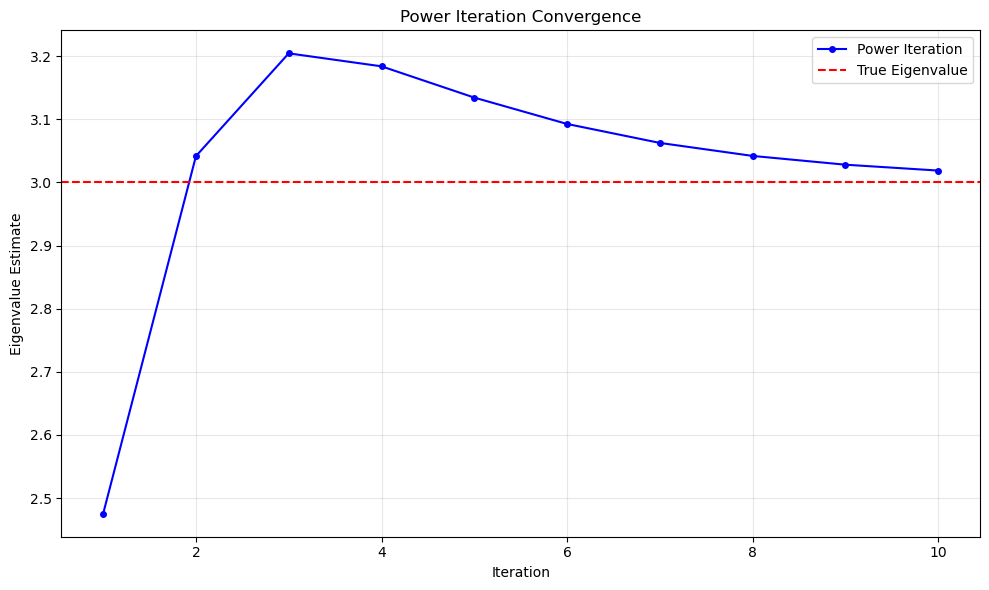

In [7]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalue_history) + 1), eigenvalue_history, 'b-o', markersize=4, label='Power Iteration')
plt.axhline(y=max_eigenvalue, color='r', linestyle='--', label='True Eigenvalue')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Estimate')
plt.title('Power Iteration Convergence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

The result is close but somewhat different starting from random initialization.

## A Brief Tangent - Properties of Symmetric Matrices

```{admonition} Properties of Symmetric Matrices
Symmetric matrices have two important properties:
- The eigenvalues of a real symmetric matrix are real.
- The eigenvectors of a real symmetric matrix corresponding to distinct eigenvalues are orthogonal.
```

 Some of the following examples exploit these properties of symmetric matrices, so let's consider why symmetric matrices have these properties. We saw previously that if a matrix had complex conjugate eigenvalues, then it had corresponding complex conjugate eigenvectors also. Let $\lambda, \bar{\lambda}$ denote a pair of complex conjugate eigenvalues of a symmetric matrix $S$, and let $\mathbf{x}, \bar{\mathbf{x}}$ denote the corresponding complex conjugate eigenvectors. Consider the following equation:

$$
    \bar{\mathbf{x}}^TS\mathbf{x} = \bar{\mathbf{x}}\lambda\mathbf{x} = \lambda\bar{\mathbf{x}}^T\mathbf{x}.
$$

Now, consider the very similar equation 

$$
    \mathbf{x}^TS\bar{\mathbf{x}} = \mathbf{x}\bar{\lambda}\bar{\mathbf{x}} = \bar{\lambda}\mathbf{x}^T\bar{\mathbf{x}}.
$$

Note that at the start of the second equation, we are calculating $\mathbf{x}^TS\bar{\mathbf{x}} = \mathbf{x}^TS^T\bar{\mathbf{x}}= (S\mathbf{x})^T\bar{\mathbf{x}}$, which is the dot product of $S\mathbf{x}$ and $\bar{\mathbf{x}}$ (we are exploiting the symmetry of $S$ here). But in the first equation, we are calculating the same dot product, but with the order of the terms reversed. The order of the terms in a dot product does not matter, so these calculations must produce the same result; that is,

$$
    \lambda\bar{\mathbf{x}}^T\mathbf{x} = \bar{\lambda}\mathbf{x}^T\bar{\mathbf{x}}.
$$

But in that equation, $\bar{\mathbf{x}}^T\mathbf{x} = \mathbf{x}^T\bar{\mathbf{x}}$ is some real number $c$, so it can be written 

$$
    \lambda \cdot c = \bar{\lambda}\cdot c,
$$

which implies that $\lambda = \bar{\lambda}$. That is only possible if the imaginary part of $\lambda$ is 0; that is, if $\lambda$ is a real number.

To see that the eigenvectors corresponding to distinct real eigenvalues of a symmetric matrix must be orthogonal, let $\lambda_1\neq\lambda_2$ be distinct eigenvalues of a symmetric matrix $S$ and let $\mathbf{x}_1, \mathbf{x}_2$ be their corresponding eigenvectors. Consider the following dot products:

$$
    (S\mathbf{x}_1)^T\mathbf{x}_2 = \lambda_1\mathbf{x}_1^T\mathbf{x_2}.
$$

This is the same as 

$$
    (S\mathbf{x}_1)^T\mathbf{x}_2 = \mathbf{x}_1^TS^T\mathbf{x_2} = \mathbf{x}_1^TS\mathbf{x_2} = \lambda_2\mathbf{x}_1^T\mathbf{x_2},
$$

which would imply that $\lambda_1 = \lambda_2$, in violation of our assumption that the eigenvalues are distinct; the only possible conclusion is that the dot product $\mathbf{x}_1^T\mathbf{x}_2 = 0$.

## Some Less Trivial Examples

**Example:** Consider the following $10\times10$ symmetric, tridiagonal example. The matrix is too large for a by-hand calculation, and tridiagonal matrices such as this one often have eigenvalues similar in magnitude, posing a potential challenge for power iteration.


--- Power Iteration Results ---
Iterations: 10
Estimated dominant eigenvalue: 10.198610

--- Verification (NumPy) ---
True dominant eigenvalue: 10.198666+0.000000j
Error: 5.62e-05

Convergence (last 5 iterations):
  Iteration 6: λ = 10.188088
  Iteration 7: λ = 10.196042
  Iteration 8: λ = 10.197969
  Iteration 9: λ = 10.198471
  Iteration 10: λ = 10.198610

Residual ||Av - λv||: 8.76e-03


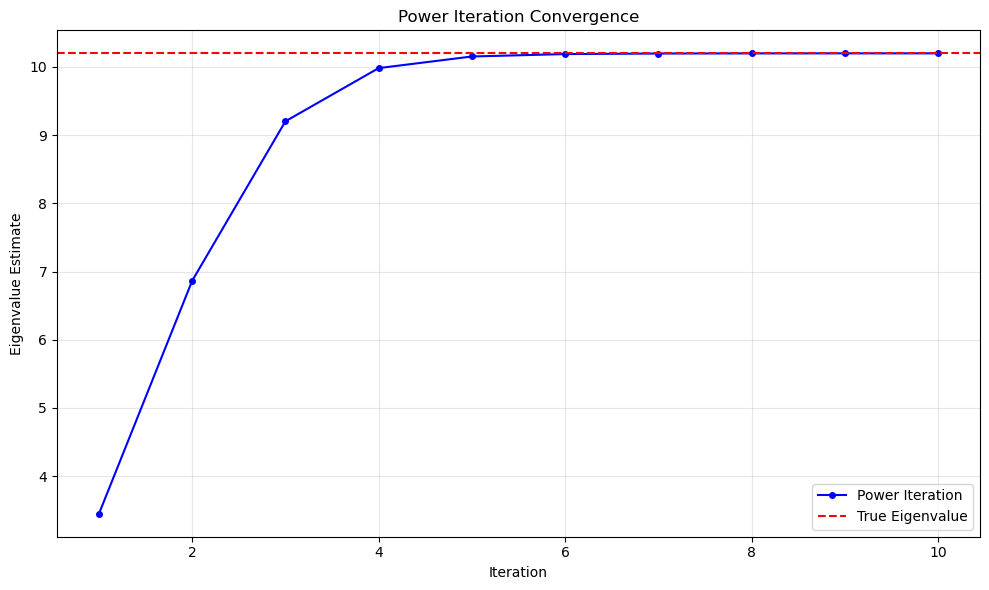

In [8]:
np.random.seed(8675309)

A =np.array([[10, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 5, 1, 0, 0, 0, 0, 0, 0, 0],
             [0, 1, 4, 1, 0, 0, 0, 0, 0, 0],
             [0, 0, 1, 3, 1, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 2, 1, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 2, 1, 0, 0, 0],
             [0, 0, 0, 0, 0, 1, 2, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 1, 2, 1, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 2, 1],
             [0, 0, 0, 0, 0, 0, 0, 0, 1, 2]]
)

num_iter = 10
random_init = np.random.randn(A.shape[1])

eigenvalue, eigenvector, history, _ = power_iteration(A, num_iter, random_init)

print(f"\n--- Power Iteration Results ---")
print(f"Iterations: {num_iter}")
print(f"Estimated dominant eigenvalue: {eigenvalue:.6f}")

# Verify with NumPy
true_eigenvalues = linalg.eigvals(A)
max_eigenvalue = true_eigenvalues.max()

print(f"\n--- Verification (NumPy) ---")
print(f"True dominant eigenvalue: {max_eigenvalue:.6f}")
print(f"Error: {abs(eigenvalue - max_eigenvalue):.2e}")

# Check convergence
print(f"\nConvergence (last 5 iterations):")
for i, val in enumerate(history[-5:], start=len(history)-4):
    print(f"  Iteration {i}: λ = {val:.6f}")

# Verify eigenvector
residual = A @ eigenvector - eigenvalue * eigenvector
residual_norm = linalg.norm(residual)
print(f"\nResidual ||Av - λv||: {residual_norm:.2e}")

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(history) + 1), history, 'b-o', markersize=4, label='Power Iteration')
plt.axhline(y=max_eigenvalue, color='r', linestyle='--', label='True Eigenvalue')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Estimate')
plt.title('Power Iteration Convergence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Although the tridiagonal example has the potential for slow convergence, in this case we have a great approximation in just a few iterations.

**Example:** Now let's create a synthetic $100\times100$ example that we can be sure will have a dominant eigenvalue. To do this, we will create a random matrix $A$, then calculate $A^TA$, which we know will be symmetric, and then we will add to $A^TA$ a rank 1 matrix multiplied by 50 (a large, arbitrarily chosen value). This will produce the desired structure in the matrix for power iteration to converge quickly, so that we can see how it works for large matrices, provided they satisfy the assumptions.

100×100 POWER ITERATION EXAMPLE

Matrix size: (100, 100)
Matrix is symmetric: True

--- Power Iteration Results ---
Iterations: 10
Estimated dominant eigenvalue: 50.313415

--- Verification (NumPy) ---
True dominant eigenvalue: 50.313415+0.000000j
Error: 4.97e-14

Convergence (last 5 iterations):
  Iteration 6: λ = 50.313415
  Iteration 7: λ = 50.313415
  Iteration 8: λ = 50.313415
  Iteration 9: λ = 50.313415
  Iteration 10: λ = 50.313415

Residual ||Av - λv||: 2.16e-08


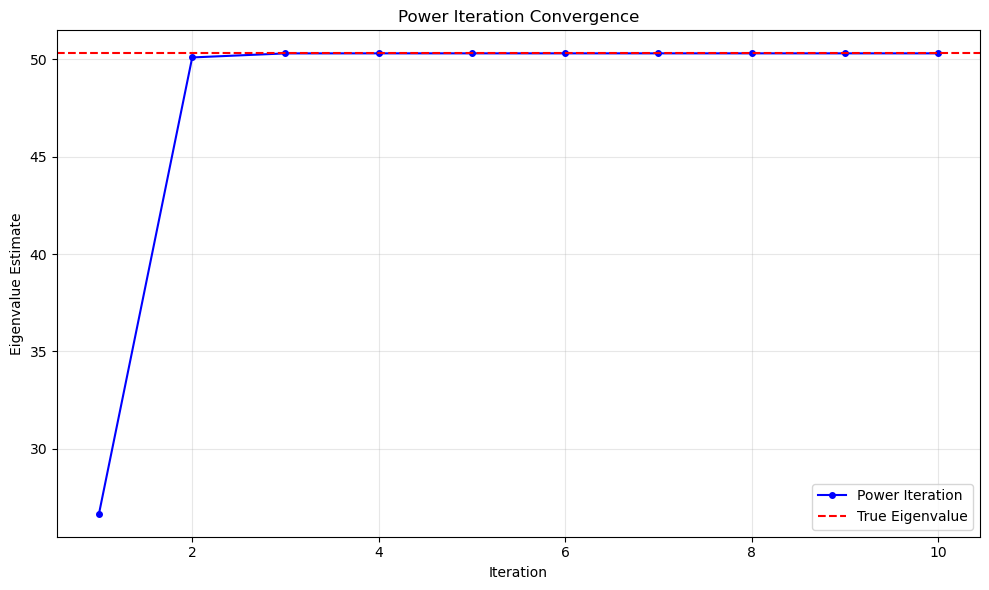


First 10 components of dominant eigenvector:
[-0.08109219 -0.03728909 -0.05780121  0.0131538   0.13214057 -0.07033478
  0.10242396 -0.08027026 -0.08669914  0.08063136]


In [11]:
# Create a 100x100 matrix with known dominant eigenvalue
np.random.seed(42)

# Method 1: Create a matrix with a clear dominant eigenvalue
# Start with a random symmetric matrix and add a rank-1 update
n = 100
base_matrix = np.random.randn(n, n)
base_matrix = (base_matrix + base_matrix.T) / 2  # Make symmetric

# Scale down the base matrix
base_matrix = base_matrix * 0.5

# Add a rank-1 update to create a dominant eigenvalue
dominant_vector = np.random.randn(n)
dominant_vector = dominant_vector / linalg.norm(dominant_vector)
dominant_eigenvalue = 50  # Much larger than others

A = base_matrix + dominant_eigenvalue * np.outer(dominant_vector, dominant_vector)

print("=" * 60)
print("100×100 POWER ITERATION EXAMPLE")
print("=" * 60)

# Use an initial estimate close to the dominant eigenvector for fast convergence
initial_guess = dominant_vector + 0.1 * np.random.randn(n)
initial_guess = initial_guess / linalg.norm(initial_guess)

print(f"\nMatrix size: {A.shape}")
print(f"Matrix is symmetric: {np.allclose(A, A.T)}")

# Run power iteration
num_iter = 10
eigenvalue, eigenvector, history, _ = power_iteration(A, num_iter, initial_guess)

print(f"\n--- Power Iteration Results ---")
print(f"Iterations: {num_iter}")
print(f"Estimated dominant eigenvalue: {eigenvalue:.6f}")

# Verify with NumPy
true_eigenvalues = linalg.eigvals(A)
max_eigenvalue = true_eigenvalues.max()

print(f"\n--- Verification (NumPy) ---")
print(f"True dominant eigenvalue: {max_eigenvalue:.6f}")
print(f"Error: {abs(eigenvalue - max_eigenvalue):.2e}")

# Check convergence
print(f"\nConvergence (last 5 iterations):")
for i, val in enumerate(history[-5:], start=len(history)-4):
    print(f"  Iteration {i}: λ = {val:.6f}")

# Verify eigenvector
residual = A @ eigenvector - eigenvalue * eigenvector
residual_norm = linalg.norm(residual)
print(f"\nResidual ||Av - λv||: {residual_norm:.2e}")

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(history) + 1), history, 'b-o', markersize=4, label='Power Iteration')
plt.axhline(y=max_eigenvalue, color='r', linestyle='--', label='True Eigenvalue')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Estimate')
plt.title('Power Iteration Convergence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Show first few components of eigenvector
print(f"\nFirst 10 components of dominant eigenvector:")
print(eigenvector[:10])

What if we had started from random initialization?


COMPARISON: Random Initialization
Estimated eigenvalue: 50.313415
Convergence at iteration 30: 50.313415


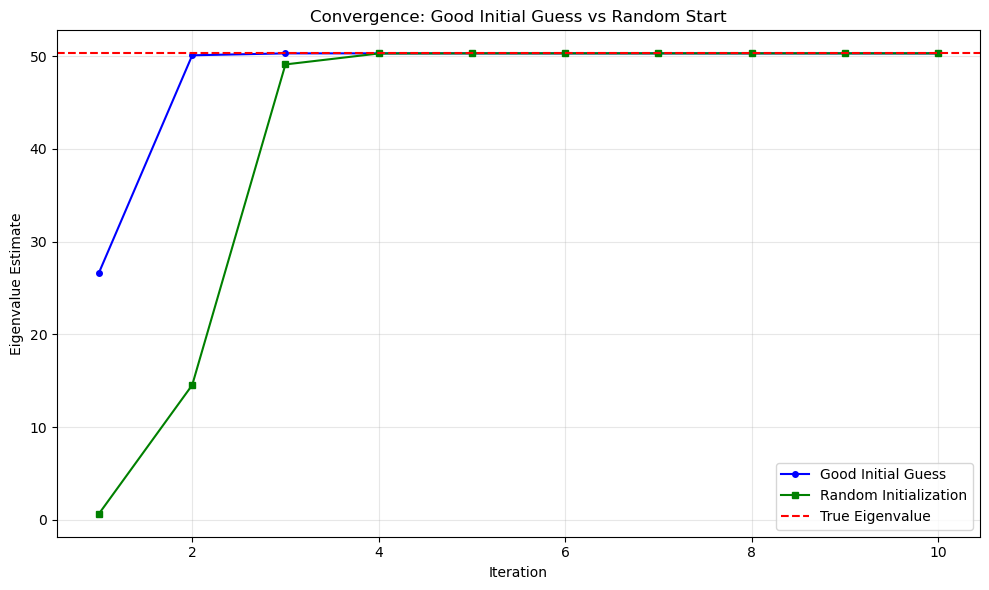

In [12]:
# Compare with random initialization (slower convergence)
print("\n" + "=" * 60)
print("COMPARISON: Random Initialization")
print("=" * 60)
random_init = np.random.randn(n)
eigenvalue_rand, _, history_rand, _ = power_iteration(A, num_iter, random_init)
print(f"Estimated eigenvalue: {eigenvalue_rand:.6f}")
print(f"Convergence at iteration 30: {history_rand[-1]:.6f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(history) + 1), history, 'b-o', markersize=4, label='Good Initial Guess')
plt.plot(range(1, len(history_rand) + 1), history_rand, 'g-s', markersize=4, label='Random Initialization')
plt.axhline(y=max_eigenvalue, color='r', linestyle='--', label='True Eigenvalue')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Estimate')
plt.title('Convergence: Good Initial Guess vs Random Start')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

We get to the same result, just a little slower.

## A Harder Example

The previous examples converged very quickly because the matrices were constructed to have an eigenvalue that was much larger than the others. The example below has largest eigenvalues that are very close in magnitude.

100×100 POWER ITERATION - DIFFICULT CASE (SLOW CONVERGENCE)

Matrix size: (100, 100)
Matrix is symmetric: True

--- True Eigenvalue Spectrum ---
λ₁ (dominant):        8.213034
λ₂ (second largest):  7.974305
λ₃ (third largest):   7.854809

Ratio λ₁/λ₂: 1.029937
Difference λ₁ - λ₂: 0.238728

Note: Small ratio means SLOW convergence!
Ideal ratio for fast convergence: > 1.5
Difficult ratio (slow convergence): < 1.1

--- Power Iteration: Random Initialization ---
Iterations: 200
Estimated eigenvalue: 8.213033
True eigenvalue:      8.213034
Error: 7.75e-07
Converged at iteration: 148

--- Power Iteration: Good Initialization ---
Estimated eigenvalue: 8.213034
Error: 6.23e-08
Converged at iteration: 111

--- Convergence Analysis (Random Init) ---
Iterations 10-20:
  Iter 10: λ = 7.840471, error = 3.73e-01
  Iter 11: λ = 7.886276, error = 3.27e-01
  Iter 12: λ = 7.923611, error = 2.89e-01
  Iter 13: λ = 7.954588, error = 2.58e-01
  Iter 14: λ = 7.980722, error = 2.32e-01
  Iter 15: λ = 8.00311

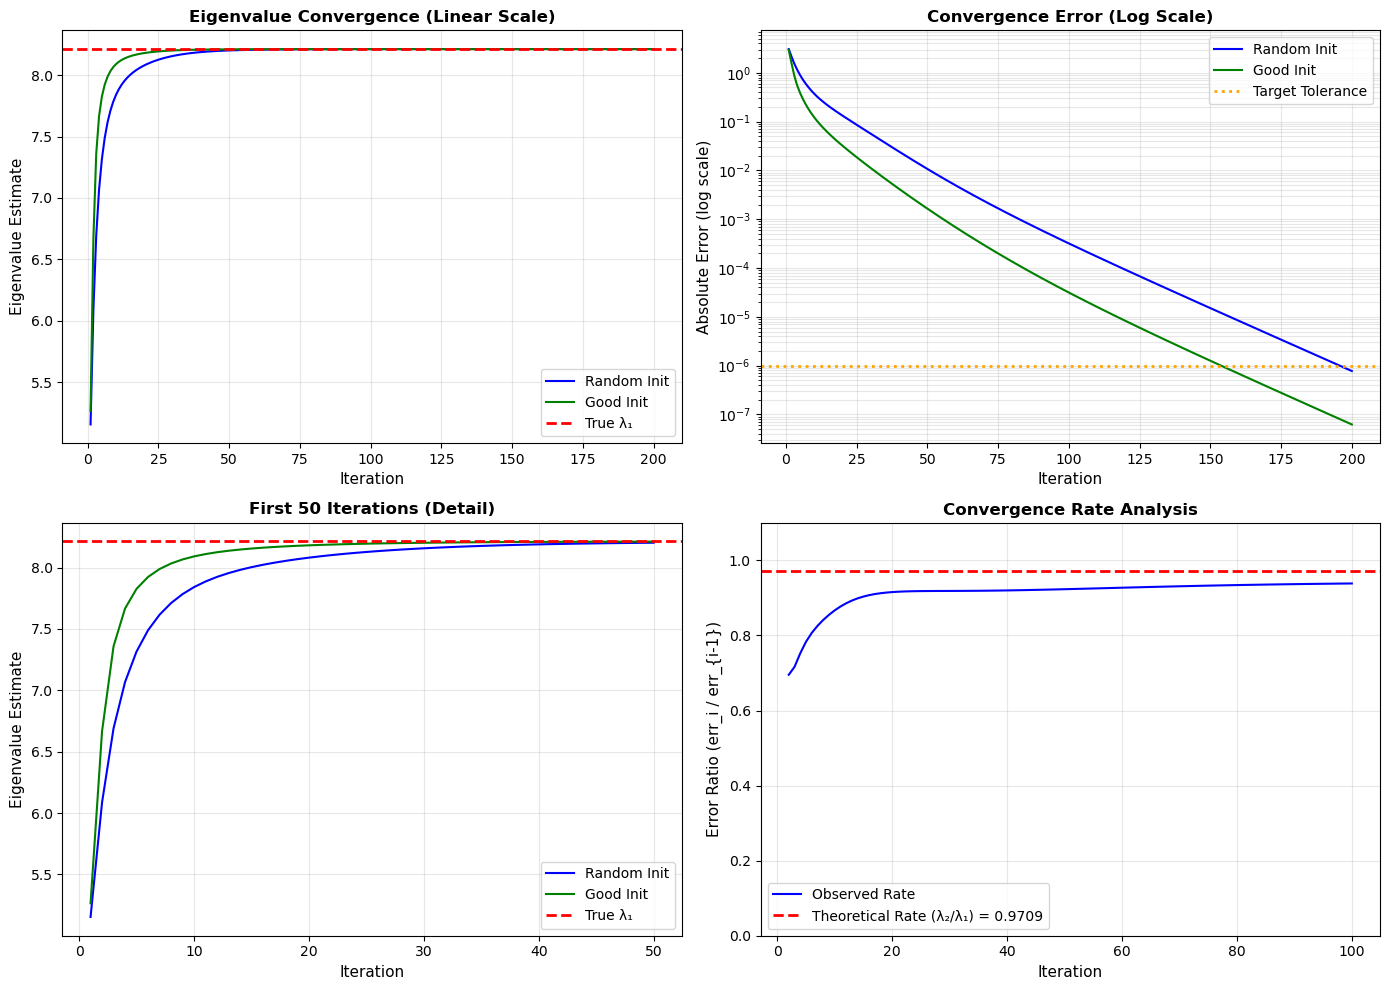


WHY IS THIS SLOW?
Power iteration converges at rate (λ₂/λ₁)ⁿ where n is iteration number.
For this matrix: (λ₂/λ₁) = 0.970933

After 50 iterations, error reduces by factor: (0.9709)^50 = 0.228804
After 100 iterations: (0.9709)^100 = 0.052351

Compare to 'nice' matrix with ratio 0.5:
After 50 iterations: (0.5)^50 = 8.88e-16 (much faster!)


In [14]:
# Create a "difficult" 100x100 matrix with slow convergence
np.random.seed(123)

n = 100

# Method: Create a matrix where the two largest eigenvalues are very close
# This leads to slow convergence because power iteration's speed depends on
# the ratio λ₁/λ₂ where λ₁ > λ₂

# Start with a tridiagonal matrix (these often have eigenvalues close together)
main_diag = 5 + 0.5 * np.random.randn(n)
off_diag = 1 + 0.2 * np.random.randn(n-1)

A = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# Add small random perturbations to make it less structured
A = A + 0.1 * np.random.randn(n, n)

# Make symmetric
A = (A + A.T) / 2

# Scale to create close eigenvalues at the top
# Add a small rank-1 update to make one eigenvalue slightly dominant
v1 = np.random.randn(n)
v1 = v1 / np.linalg.norm(v1)
A = A + 1.5 * np.outer(v1, v1)  # Small eigenvalue boost

print("=" * 70)
print("100×100 POWER ITERATION - DIFFICULT CASE (SLOW CONVERGENCE)")
print("=" * 70)

print(f"\nMatrix size: {A.shape}")
print(f"Matrix is symmetric: {np.allclose(A, A.T)}")

# Get true eigenvalues to show the difficulty
true_eigenvalues = linalg.eigvalsh(A)  # specialized eigenvalue function for symmetric matrices - returns eigenvalues in ascending order
lambda1 = true_eigenvalues[-1]
lambda2 = true_eigenvalues[-2]
lambda3 = true_eigenvalues[-3]

print(f"\n--- True Eigenvalue Spectrum ---")
print(f"λ₁ (dominant):        {lambda1:.6f}")
print(f"λ₂ (second largest):  {lambda2:.6f}")
print(f"λ₃ (third largest):   {lambda3:.6f}")
print(f"\nRatio λ₁/λ₂: {lambda1/lambda2:.6f}")
print(f"Difference λ₁ - λ₂: {lambda1 - lambda2:.6f}")
print(f"\nNote: Small ratio means SLOW convergence!")
print(f"Ideal ratio for fast convergence: > 1.5")
print(f"Difficult ratio (slow convergence): < 1.1")

# Random initialization
num_iter = 200
random_init = np.random.randn(n)
eigenvalue_rand, eigenvector_rand, history_rand, conv_rand = power_iteration(
    A, num_iter, random_init, tolerance=1e-6
)

print(f"\n--- Power Iteration: Random Initialization ---")
print(f"Iterations: {num_iter}")
print(f"Estimated eigenvalue: {eigenvalue_rand:.6f}")
print(f"True eigenvalue:      {lambda1:.6f}")
print(f"Error: {abs(eigenvalue_rand - lambda1):.2e}")
if conv_rand > 0:
    print(f"Converged at iteration: {conv_rand}")
else:
    print(f"Did NOT converge to tolerance 1e-6 in {num_iter} iterations")

# Better initialization (closer to true eigenvector)
true_eigenvector = linalg.eigh(A)[1][:, -1]
good_init = true_eigenvector + 0.3 * np.random.randn(n)
good_init = good_init / linalg.norm(good_init)

eigenvalue_good, eigenvector_good, history_good, conv_good = power_iteration(
    A, num_iter, good_init, tolerance=1e-6
)

print(f"\n--- Power Iteration: Good Initialization ---")
print(f"Estimated eigenvalue: {eigenvalue_good:.6f}")
print(f"Error: {abs(eigenvalue_good - lambda1):.2e}")
if conv_good > 0:
    print(f"Converged at iteration: {conv_good}")

# Show convergence behavior
print(f"\n--- Convergence Analysis (Random Init) ---")
print(f"Iterations 10-20:")
for i in range(10, min(21, len(history_rand))):
    error = abs(history_rand[i-1] - lambda1)
    print(f"  Iter {i}: λ = {history_rand[i-1]:.6f}, error = {error:.2e}")

print(f"\nIterations 50-60:")
for i in range(50, min(61, len(history_rand)), 10):
    if i < len(history_rand):
        error = abs(history_rand[i-1] - lambda1)
        print(f"  Iter {i}: λ = {history_rand[i-1]:.6f}, error = {error:.2e}")

print(f"\nLast 5 iterations:")
for i in range(max(1, len(history_rand)-4), len(history_rand)+1):
    error = abs(history_rand[i-1] - lambda1)
    print(f"  Iter {i}: λ = {history_rand[i-1]:.6f}, error = {error:.2e}")

# Verify eigenvector
residual_rand = A @ eigenvector_rand - eigenvalue_rand * eigenvector_rand
residual_norm_rand = linalg.norm(residual_rand)
print(f"\nResidual ||Av - λv||: {residual_norm_rand:.2e}")

# Plot convergence - log scale to show slow convergence
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Eigenvalue estimates over iterations
ax1 = axes[0, 0]
ax1.plot(range(1, len(history_rand) + 1), history_rand, 'b-', linewidth=1.5, label='Random Init')
ax1.plot(range(1, len(history_good) + 1), history_good, 'g-', linewidth=1.5, label='Good Init')
ax1.axhline(y=lambda1, color='r', linestyle='--', linewidth=2, label='True λ₁')
ax1.set_xlabel('Iteration', fontsize=11)
ax1.set_ylabel('Eigenvalue Estimate', fontsize=11)
ax1.set_title('Eigenvalue Convergence (Linear Scale)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Plot 2: Error over iterations (log scale)
ax2 = axes[0, 1]
errors_rand = [abs(val - lambda1) for val in history_rand]
errors_good = [abs(val - lambda1) for val in history_good]
ax2.semilogy(range(1, len(errors_rand) + 1), errors_rand, 'b-', linewidth=1.5, label='Random Init')
ax2.semilogy(range(1, len(errors_good) + 1), errors_good, 'g-', linewidth=1.5, label='Good Init')
ax2.axhline(y=1e-6, color='orange', linestyle=':', linewidth=2, label='Target Tolerance')
ax2.set_xlabel('Iteration', fontsize=11)
ax2.set_ylabel('Absolute Error (log scale)', fontsize=11)
ax2.set_title('Convergence Error (Log Scale)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both')
ax2.legend(fontsize=10)

# Plot 3: Zoomed view of first 50 iterations
ax3 = axes[1, 0]
ax3.plot(range(1, min(51, len(history_rand) + 1)), history_rand[:50], 'b-', linewidth=1.5, label='Random Init')
ax3.plot(range(1, min(51, len(history_good) + 1)), history_good[:50], 'g-', linewidth=1.5, label='Good Init')
ax3.axhline(y=lambda1, color='r', linestyle='--', linewidth=2, label='True λ₁')
ax3.set_xlabel('Iteration', fontsize=11)
ax3.set_ylabel('Eigenvalue Estimate', fontsize=11)
ax3.set_title('First 50 Iterations (Detail)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=10)

# Plot 4: Convergence rate
ax4 = axes[1, 1]
if len(errors_rand) > 1:
    # Calculate convergence rate (ratio of consecutive errors)
    rates_rand = [errors_rand[i] / errors_rand[i-1] if errors_rand[i-1] != 0 else 0
                  for i in range(1, min(100, len(errors_rand)))]
    theoretical_rate = lambda2 / lambda1
    ax4.plot(range(2, len(rates_rand) + 2), rates_rand, 'b-', linewidth=1.5, label='Observed Rate')
    ax4.axhline(y=theoretical_rate, color='r', linestyle='--', linewidth=2,
                label=f'Theoretical Rate (λ₂/λ₁) = {theoretical_rate:.4f}')
    ax4.set_xlabel('Iteration', fontsize=11)
    ax4.set_ylabel('Error Ratio (err_i / err_{i-1})', fontsize=11)
    ax4.set_title('Convergence Rate Analysis', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=10)
    ax4.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

print(f"\n" + "=" * 70)
print("WHY IS THIS SLOW?")
print("=" * 70)
print(f"Power iteration converges at rate (λ₂/λ₁)ⁿ where n is iteration number.")
print(f"For this matrix: (λ₂/λ₁) = {lambda2/lambda1:.6f}")
print(f"\nAfter 50 iterations, error reduces by factor: ({lambda2/lambda1:.4f})^50 = {(lambda2/lambda1)**50:.6f}")
print(f"After 100 iterations: ({lambda2/lambda1:.4f})^100 = {(lambda2/lambda1)**100:.6f}")
print(f"\nCompare to 'nice' matrix with ratio 0.5:")
print(f"After 50 iterations: (0.5)^50 = {0.5**50:.2e} (much faster!)")

As you can see, convergence is much slower this time, and having a good initialization has a larger impact than in previous examples.